# Aim

Build and analyze a Kalman filter on real SEAL data, in particular to notch out the natural frequency at 17 Hz.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.signal import welch, windows
from scipy.stats import normaltest, chi2
from matplotlib import pyplot as plt

In [3]:
import sys
sys.path.append("..")
from src.utils import genpsd
from src.observer import Observer
from src.fractal_deriv import te, design_filt, filt

In [4]:
ol = np.load("../data/bench/tt_center_noise/tt_center_noise_nsteps_10000_delay_0.01_dt_21_07_2021_12.npy")[:,0]

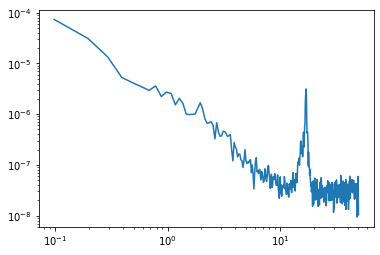

In [5]:
f, p = genpsd(ol, dt=0.01, nseg=8)
plt.loglog(f, p)

In [6]:
obs = Observer(f_sampling=100, time_id=20)
kfv = obs.make_kfilter_vibe(*obs.vibe_fit_freq(p)) # reset variances somehow
kft = obs.make_kfilter_ar(5, ol)
kf = kfv + kft

Solved discrete ARE.
Solved discrete ARE.
Solved discrete ARE.


In [7]:
random_timeseries = np.random.normal(np.mean(ol), np.std(ol), size=ol.shape)

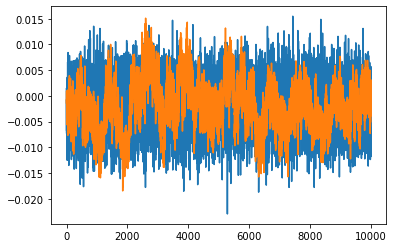

In [8]:
plt.plot(random_timeseries)
plt.plot(ol)

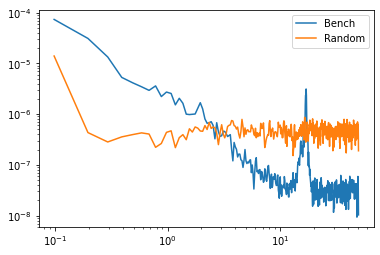

In [9]:
fr, pr = genpsd(random_timeseries, dt=0.01, nseg=8)
plt.loglog(f, p, label="Bench")
plt.loglog(fr, pr, label="Random")
plt.legend()